# Face Detection using CNN


CNN(Convolutional Neural Network) face detector that is both highly accurate and very robust, capable of detecting faces from varying viewing angles, lighting conditions.
Convolutional Layers: These layers learn hierarchical features from the image, capturing patterns like edges, textures, and shapes.
Here we are taken Tom Cruise and Matt Damon images to face detection.

In [76]:
# import library what we need 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as snb
import os
import cv2 as cv

In [77]:
for k in os.listdir("Tom Cruise"):
    print(k)

tom cruise 2.png
tom cruise 3.png
tom cruise 4.png
tom cruise 5.png
tom cruise.png


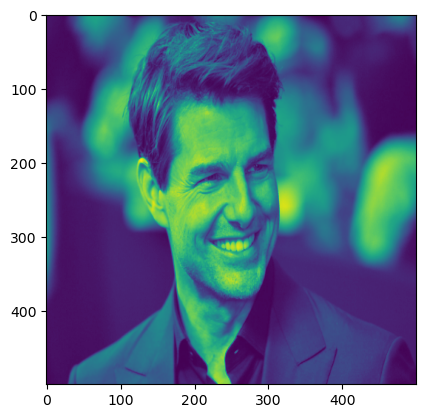

In [78]:
# plot the image
for f in os.listdir('Tom Cruise'):
    ar = cv.imread('Tom Cruise/'+f)
    gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY)
    img=cv.resize(gr,(500,500))
    fing=img.flatten()
    plt.imshow(img)

In [79]:
z=np.zeros((1,2916))
for f in os.listdir('Tom Cruise'):
    ar = cv.imread('Tom Cruise/'+f)
    gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY)
    img=cv.resize(gr,(54,54))
    fing=img.flatten()
    z=np.append(z,[fing], axis=0)

In [80]:
z.shape

(6, 2916)

# CNN ----Convolutional Neural Network

In [81]:
# iterating face images through a directory structure (Main)
# reading path of the images and stored in 'j'
ls=[]             
for k in os.listdir('Main'):  
    for j in os.path.abspath(k):  
        ar=cv.imread(os.path.abspath(j)) 
        ls.append(ar)

In [82]:
ls=[]
for k in os.listdir('Main'):
    for j in os.listdir('Main'+'/'+k):  # changing path into array
        ar=cv.imread('Main'+'/'+k+'/'+j)
        gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY) # changing colour to black and white
        img=cv.resize(gr,(54,54))
        fimg=img.flatten() # resize the images
        ls.append(img)
    

In [83]:
ls

[array([[53, 54, 52, ..., 41, 39, 37],
        [52, 58, 57, ..., 37, 39, 37],
        [53, 52, 56, ..., 43, 40, 40],
        ...,
        [ 2,  2,  2, ..., 61, 64, 70],
        [20, 20, 20, ..., 20, 20, 20],
        [19, 19, 19, ..., 19, 19, 19]], dtype=uint8),
 array([[33, 37, 37, ..., 17, 25, 26],
        [33, 38, 39, ..., 17, 26, 26],
        [33, 38, 40, ..., 17, 27, 27],
        ...,
        [ 9, 10, 11, ..., 10, 22, 22],
        [20, 21, 21, ..., 21, 21, 21],
        [20, 20, 20, ..., 20, 20, 20]], dtype=uint8),
 array([[ 24,  24,  24, ...,  24,  24,  24],
        [ 24,  24,  24, ...,  24,  24,  24],
        [129, 128, 141, ..., 121, 118, 113],
        ...,
        [ 34,  35,  35, ..., 130, 126, 122],
        [ 11,  36,  17, ...,  85,  84,  83],
        [ 20,  20,  20, ...,  20,  20,  20]], dtype=uint8),
 array([[ 41, 212, 215, ..., 216, 216, 215],
        [ 41, 214, 216, ..., 219, 218, 217],
        [ 40, 215, 216, ..., 221, 220, 219],
        ...,
        [ 39,  21,  24, ...,  

In [84]:
img.shape

(54, 54)

In [85]:
len(ls)

10

In [86]:
ls=[]
for k in os.listdir('Main'):
    for j in os.listdir('Main'+'/'+k):  
        ar=cv.imread('Main'+'/'+k+'/'+j)
        gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY)  # Convert the image to grayscale
        img=cv.resize(gr,(54,54))   #  Resize the cropped face to a smaller size
        flt=img.reshape(1,-1)  #  Flatten the resized face image into a 1D array
        print(flt)
        print(flt.shape)

[[53 54 52 ... 19 19 19]]
(1, 2916)
[[33 37 37 ... 20 20 20]]
(1, 2916)
[[24 24 24 ... 20 20 20]]
(1, 2916)
[[ 41 212 215 ...  42  43  43]]
(1, 2916)
[[41 22 22 ... 47 46 46]]
(1, 2916)
[[72 45 28 ... 53 37 22]]
(1, 2916)
[[214 214 214 ...  35  34  30]]
(1, 2916)
[[43 45 45 ... 16 11 21]]
(1, 2916)
[[25 47 58 ... 44 45 42]]
(1, 2916)
[[14 12  8 ...  6  6  4]]
(1, 2916)


In [87]:
# vstacking will help to make all the in one array:
emt=np.zeros((1,2916))
for k in os.listdir('Main'):
    for j in os.listdir('Main'+'/'+k):  
        ar=cv.imread('Main'+'/'+k+'/'+j)
        gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY) 
        img=cv.resize(gr,(54,54)) 
        flt=img.reshape(1,-1)
        
        emt= np.vstack([emt,flt])
        print(emt.shape)
        
    

(2, 2916)
(3, 2916)
(4, 2916)
(5, 2916)
(6, 2916)
(7, 2916)
(8, 2916)
(9, 2916)
(10, 2916)
(11, 2916)


In [88]:
emt.shape  # increased 1 column b/c added zeros in the loop

(11, 2916)

In [89]:
nar=np.delete(emt,0,axis=0) # deleting one column so axis is 0

In [90]:
nar.shape

(10, 2916)

In [91]:
har=cv.CascadeClassifier("haarcascade_frontalface_default.xml")
har.detectMultiScale(ar,scaleFactor=1.1,minNeighbors=9)

array([[214, 118, 215, 215]])

In [92]:
faces_rect = har.detectMultiScale(ar, scaleFactor=1.1, minNeighbors=9) 
faces_rect

for (x, y, w, h) in faces_rect: 
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

In [93]:
for p in os.listdir('Main'):

    for k in os.listdir('Main/' + p):

        img = cv.imread('Main/' + p + '/'+ k)
        ar = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        faces_rect = har.detectMultiScale(ar, scaleFactor=1.1, minNeighbors=9, flags=cv.CASCADE_SCALE_IMAGE)

        for (x, y, w, h) in faces_rect: 
            ar = ar[y:y+h, x:x+w]

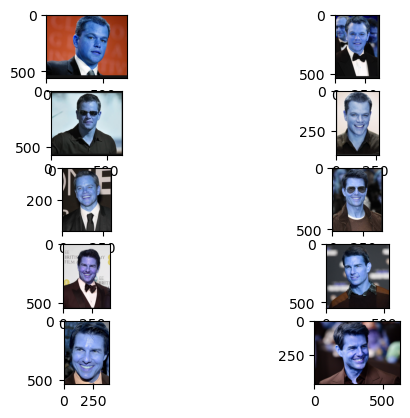

In [94]:
c=0
for k in os.listdir("Main"):
    for j in os.listdir('Main'+'/'+k): 
        c=c+1
        ar=cv.imread('Main'+'/'+k+'/'+j)
        plt.subplot(5,2,c)
        plt.imshow(ar)

In [95]:
emt = np.zeros((1,2916))
c=0
for k in os.listdir('Main'):
    for j in os.listdir(os.path.abspath('Main/' + k)):
        c=c+1
        img=cv.imread(os.path.abspath('Main/'+k+'/' +j))
        ar=cv.cvtColor(img,cv.COLOR_BGR2GRAY)  # Convert the image to grayscale
        
        # Detect faces using Haar cascades
        # Crop the detected face region from the original image
        faces_rect = har.detectMultiScale(ar, scaleFactor=1.1, minNeighbors=9, flags=cv.CASCADE_SCALE_IMAGE)

        for (x, y, w, h) in faces_rect: 
            ar = ar[y:y+h, x:x+w]
        
        fling=cv.resize(ar,(54,54))   #  Resize the cropped face to a smaller size
        flt = fling.reshape(1,-1)     #  Flatten the resized face image into a 1D array
        

In [96]:
nar

array([[53., 54., 52., ..., 19., 19., 19.],
       [33., 37., 37., ..., 20., 20., 20.],
       [24., 24., 24., ..., 20., 20., 20.],
       ...,
       [43., 45., 45., ..., 16., 11., 21.],
       [25., 47., 58., ..., 44., 45., 42.],
       [14., 12.,  8., ...,  6.,  6.,  4.]])

In [97]:
from sklearn.neural_network import MLPClassifier

In [105]:
mod = MLPClassifier((1000,500,50))

In [106]:
mod.fit(nar,[0,0,0,0,0,1,1,1,1,1])

MLPClassifier(hidden_layer_sizes=(1000, 500, 50))

In [107]:
har=cv.CascadeClassifier("haarcascade_frontalface_default.xml")

In [108]:
# taken same persons different images to check predict properly or not
ar = cv.imread("MT/tom cruise 4.jpg")
print(ar.shape)
gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY)
faces_rect = har.detectMultiScale(gr, scaleFactor=1.1, minNeighbors=9, flags=cv.CASCADE_SCALE_IMAGE)
for (x, y, w, h) in faces_rect: 
        gr = gr[y:y+h, x:x+w]

img=cv.resize(gr,(54,54))
rsz=img.reshape(1,2916)

rsz.shape


(546, 541, 3)


(1, 2916)

In [109]:
mod.predict(rsz)

array([0])

In [110]:
ar = cv.imread("MT/matt.jpg")
print(ar.shape)
gr=cv.cvtColor(ar,cv.COLOR_BGR2GRAY)
faces_rect = har.detectMultiScale(gr, scaleFactor=1.1, minNeighbors=9, flags=cv.CASCADE_SCALE_IMAGE)
for (x, y, w, h) in faces_rect: 
        gr = gr[y:y+h, x:x+w]

img=cv.resize(gr,(54,54))
rs=img.reshape(1,2916)

rs.shape


(539, 372, 3)


(1, 2916)

In [111]:
mod.predict(rs)

array([1])